# English Sentiment Analysis

In [126]:
import pandas as pd
from ftfy import fix_text
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import nltk
from langdetect import detect, LangDetectException
from tqdm import tqdm
import html
import string
import re
import matplotlib.pyplot as plt

## Data Loading

In [62]:
df = pd.read_csv(r"C:\Users\Shosh\Desktop\Univeristy\Semester 6\Data Science\Project\english dataset.csv", encoding="ISO-8859-1", header=None)
df.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [63]:
columns = ["target", "ids", "date", "flag", "user", "tweet"]
df.columns= columns
df.head()

,target,ids,date,flag,user,tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   ids     1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   tweet   1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [65]:
df.duplicated().sum()

np.int64(0)

In [66]:
df.isna().sum()

target    0
ids       0
date      0
flag      0
user      0
tweet     0
dtype: int64

In [67]:
# extract el cols el me7taga
data = df[['tweet','target']]
data.head()


,tweet,target
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0
1,is upset that he can't update his Facebook by ...,0
2,@Kenichan I dived many times for the ball. Man...,0
3,my whole body feels itchy and like its on fire,0
4,"@nationwideclass no, it's not behaving at all....",0


## Tweet Cleaning

In [68]:
data['tweet'][0]

"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D"

In [69]:
def clean_tweet(text):
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)  # Remove URLs
    text = re.sub(r'@\w+', '', text)  # Remove @mentions
    text = re.sub(r'#\w+', '', text)  # Optional: Remove hashtags
    text = re.sub(r'\s+', ' ', text)  # Replace multiple spaces with one
    return text.strip()




In [70]:
clean_tweet(data['tweet'][0])

"- A that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"

In [71]:
data['tweet'] = data['tweet'].apply(clean_tweet)

C:\Users\Shosh\AppData\Local\Temp\ipykernel_11964\339823103.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['tweet'] = data['tweet'].apply(clean_tweet)


In [72]:
data.head(10)

,tweet,target
0,- A that's a bummer. You shoulda got David Car...,0
1,is upset that he can't update his Facebook by ...,0
2,I dived many times for the ball. Managed to sa...,0
3,my whole body feels itchy and like its on fire,0
4,"no, it's not behaving at all. i'm mad. why am ...",0
5,not the whole crew,0
6,Need a hug,0
7,"hey long time no see! Yes.. Rains a bit ,only ...",0
8,nope they didn't have it,0
9,que me muera ?,0


## Normalization

In [73]:
def normalize_text(text):
    # Lowercase
    text = text.lower()
    # Remove excessive punctuation (e.g., ... → empty, . → empty)
    text = re.sub(r'[^\w\s]', '', text)
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    return text


In [74]:
data['normalized_tweet'] = data['tweet'].apply(normalize_text)


C:\Users\Shosh\AppData\Local\Temp\ipykernel_11964\3244975462.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['normalized_tweet'] = data['tweet'].apply(normalize_text)


In [75]:
data.head(10)

,tweet,target,normalized_tweet
0,- A that's a bummer. You shoulda got David Car...,0,a thats a bummer you shoulda got david carr of...
1,is upset that he can't update his Facebook by ...,0,is upset that he cant update his facebook by t...
2,I dived many times for the ball. Managed to sa...,0,i dived many times for the ball managed to sav...
3,my whole body feels itchy and like its on fire,0,my whole body feels itchy and like its on fire
4,"no, it's not behaving at all. i'm mad. why am ...",0,no its not behaving at all im mad why am i her...
5,not the whole crew,0,not the whole crew
6,Need a hug,0,need a hug
7,"hey long time no see! Yes.. Rains a bit ,only ...",0,hey long time no see yes rains a bit only a bi...
8,nope they didn't have it,0,nope they didnt have it
9,que me muera ?,0,que me muera


In [76]:
import ftfy  # fixes text for you!

# install it first if needed: pip install ftfy

data["normalized_tweet"] = data["normalized_tweet"].apply(fix_text)


C:\Users\Shosh\AppData\Local\Temp\ipykernel_11964\895449020.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["normalized_tweet"] = data["normalized_tweet"].apply(fix_text)


## Duplication

In [77]:
duplicates=data.duplicated(subset='normalized_tweet')
counts= duplicates.value_counts()
print(counts)

False    1519313
True       80687
Name: count, dtype: int64


In [78]:
data.duplicated().sum()

np.int64(47969)

In [79]:
#Find duplicated tweets
conflicts = data[data.duplicated(subset='normalized_tweet', keep=False)]

#Group by tweet and collect targets
conflicting_tweets = conflicts.groupby('normalized_tweet')['target'].apply(list)

#Filter only tweets that have conflicting targets
conflicting_tweets = conflicting_tweets[conflicting_tweets.apply(lambda x: len(set(x)) > 1)]

#Create a DataFrame for display
conflicting_tweets_df = pd.DataFrame({
    'normalized_tweet': conflicting_tweets.index,
    'Conflicting Targets': conflicting_tweets.values
})

#Truncate long lists in 'Conflicting Targets' (show first 5 elements)
conflicting_tweets_df['Conflicting Targets'] = conflicting_tweets_df['Conflicting Targets'].apply(
    lambda x: f"{x[:5]}... (total {len(x)})" if len(x) > 5 else x
)

#Set display options
pd.set_option('display.max_colwidth', 50)  # Limit tweet width
pd.set_option('display.width', 1000)       # Ensure table fits horizontally

# Display first 10 rows
print(conflicting_tweets_df.head(20))

# Optional: Show total count
print(f"\nTotal conflicting tweets: {len(conflicting_tweets_df)}")

                                     normalized_tweet              Conflicting Targets
0                                                      [0, 0, 0, 0, 0]... (total 3439)
1   00 and the kiss i want to see it im so happy t...                           [0, 4]
2                                                   1     [0, 0, 4, 4, 4]... (total 6)
3   1 1 rohan slept well but woke up at 6am then a...                           [0, 4]
4                                 1 exam down 4 to go                           [0, 4]
5   1 hour53 minutes actually from 85th to 33rd ah...                           [0, 4]
6                                          1 more day                           [0, 4]
7   1 new outfit and a pair of shoes is allifound ...                        [0, 0, 4]
8   1 uh huhs sures x 2 happy bday to you 3 awwwww...                           [0, 4]
9                                           100 agree                           [0, 4]
10  1027 am in two hours i have to go at sc

In [80]:
# Create a DataFrame for export (without truncation)
conflicting_tweets_df = pd.DataFrame({
    'normalized_tweet': conflicting_tweets.index,
    'Conflicting Targets': conflicting_tweets.values,
    'Number of Conflicts': conflicting_tweets.apply(len)  # Add count of conflicts
})

# Export to Excel (full content, no truncation)
output_file = "conflicting_tweets_full1.xlsx"
conflicting_tweets_df.to_excel(output_file, index=False)

print(f"Successfully saved all {len(conflicting_tweets_df)} conflicting tweets to '{output_file}'")

Successfully saved all 4110 conflicting tweets to 'conflicting_tweets_full1.xlsx'


In [81]:
# def resolve_conflict(labels, tweet):
#     # Threshold for short tweets (adjust as needed)
#     word_count = len(tweet.split())
#     if word_count < 2:
#         return 'drop'
#
#     label_counts = pd.Series(labels).value_counts()
#
#     if len(label_counts) == 1:
#         return label_counts.index[0]
#     elif label_counts.get(0, 0) == label_counts.get(4, 0):
#         return 2  # Equal → Neutral
#     elif abs(label_counts.get(0, 0) - label_counts.get(4, 0)) == 1:
#         return 'drop'  # Too close, too risky
#     else:
#         return label_counts.idxmax()  # Strong majority


In [82]:
def resolve_conflict(labels, tweet):
    # Threshold for short tweets (adjust as needed)
    word_count = len(tweet.split())
    if word_count < 2:
        return 'drop'

    label_counts = pd.Series(labels).value_counts()

    if len(label_counts) == 1:
        return label_counts.index[0]
    elif label_counts.get(0, 0) == label_counts.get(4, 0):
        return 'drop'  # Previously neutral, now drop
    elif abs(label_counts.get(0, 0) - label_counts.get(4, 0)) == 1:
        return 'drop'  # Too close, too risky
    else:
        return label_counts.idxmax()  # Strong majority


In [83]:
#Group by normalized tweet
grouped = data.groupby("normalized_tweet")["target"].apply(list).reset_index(name="labels")

#Apply the conflict resolution function
grouped["resolved_label"] = grouped.apply(
    lambda row: resolve_conflict(row["labels"], row["normalized_tweet"]),
    axis=1
)

# Merge resolved labels back to main dataframe
data = data.merge(grouped[["normalized_tweet", "resolved_label"]], on="normalized_tweet", how="left")

#Drop rows marked as 'drop'
data = data[data["resolved_label"] != "drop"].copy()

#Update target column
data["target"] = data["resolved_label"]

#Drop the helper column
data.drop(columns=["resolved_label"], inplace=True)

# Optional: Reset index
data.reset_index(drop=True, inplace=True)


In [84]:
dups = data[data.duplicated(subset="normalized_tweet", keep=False)]
print(f"Total remaining duplicated normalized tweets: {len(dups)}")


Total remaining duplicated normalized tweets: 79428


In [85]:
conflicts_check = data.groupby("normalized_tweet")["target"].nunique()
conflicting_final = conflicts_check[conflicts_check > 1]
print(f"Tweets with conflicting labels after cleanup: {len(conflicting_final)}")


Tweets with conflicting labels after cleanup: 0


In [86]:
# Drop duplicate tweets after resolving conflicts
data = data.drop_duplicates(subset=["normalized_tweet"]).reset_index(drop=True)

# Check again for duplicates
dups = data[data.duplicated(subset="normalized_tweet", keep=False)]
print(f"Total remaining duplicated normalized tweets: {len(dups)}")


Total remaining duplicated normalized tweets: 0


In [87]:
data.duplicated().sum()

np.int64(0)

## Additional Text Cleaning
1. Remove unnecessary punctuation to enhance textual clarity.
2. Correct spelling errors to improve accuracy. If a word remains nonsensical after correction, it is classified as an outlier for removal.
3. Apply the TF-IDF model, which requires properly spelled words, to effectively identify and filter out low-value or meaningless terms.



In [88]:
data.shape

(1512041, 3)

In [89]:
data.head()

,tweet,target,normalized_tweet
0,- A that's a bummer. You shoulda got David Car...,0,a thats a bummer you shoulda got david carr of...
1,is upset that he can't update his Facebook by ...,0,is upset that he cant update his facebook by t...
2,I dived many times for the ball. Managed to sa...,0,i dived many times for the ball managed to sav...
3,my whole body feels itchy and like its on fire,0,my whole body feels itchy and like its on fire
4,"no, it's not behaving at all. i'm mad. why am ...",0,no its not behaving at all im mad why am i her...


In [90]:
# Define punctuation considered meaningless (not including ? and !)
meaningless_punctuations = ["_", "-", "___", "....", "....", "...", "--"]

# Check if a token is meaningless punctuation
def contains_meaningless_punct(text):
    tokens = text.split()
    return any(
        re.fullmatch(rf"[{re.escape(punct)}]+", token) for punct in meaningless_punctuations for token in tokens
    )

# Detect tweets with meaningless punctuation tokens
punct_token_tweets = data[data["normalized_tweet"].apply(contains_meaningless_punct)]

# Show how many tweets contain these meaningless punctuations
print(f"Tweets with meaningless punctuation tokens: {len(punct_token_tweets)}")

# Display the first 10 tweets with meaningless punctuation
print(punct_token_tweets["normalized_tweet"].head(10))


Tweets with meaningless punctuation tokens: 1108
2047     think im an insomniac i just cant sleep birthd...
3796     this will have to do i lost the password to th...
4172     rainy day so bad trying to make my hair look g...
4288     goign 2 scholl baghhh _ im tires woke up early...
5254     i want to come home from work im sick _ my leg...
8261     finally going to the social security offices _...
8715     honey what i must do for you tell me quothiquo...
12477    ugggh ___ have to go cut the grass then write ...
12826    wish i could watch im out of town and only mob...
13301    i spent the whole morning practicing piano i n...
Name: normalized_tweet, dtype: object


In [91]:
def remove_meaningless_punct_tokens(text):
    tokens = text.split()
    cleaned = [
        token for token in tokens
        if not re.fullmatch(rf"[{re.escape(string.punctuation)}]+", token)
    ]
    return " ".join(cleaned)


In [92]:
# Apply the function
data["normalized_tweet"] = data["normalized_tweet"].apply(remove_meaningless_punct_tokens)


In [93]:
# Count the tweets with meaningless punctuation after removal
remaining_punct_tweets = data[data["normalized_tweet"].apply(contains_meaningless_punct)]
print(f"Remaining tweets with meaningless punctuation tokens: {len(remaining_punct_tweets)}")


Remaining tweets with meaningless punctuation tokens: 0


In [94]:
# #will see the accuracy without correcting spelling mistakes: 78%
# import pandas as pd
# from tqdm import tqdm
# from autocorrect import Speller
#
# # Initialize the spell checker
# spell = Speller()
#
# # Function to correct spelling
# def correct_spelling_autocorrect(text):
#     return spell(text)
#
# # Batch processing for spell correction
# def batch_process_spell_check(df, batch_size=10000):
#     corrected_texts = []
#     for start in tqdm(range(0, len(df), batch_size)):
#         batch = df["normalized_tweet"].iloc[start:start+batch_size]
#         corrected_batch = batch.apply(correct_spelling_autocorrect)
#         corrected_texts.extend(corrected_batch)
#     return corrected_texts
#
# # Assuming `data` is the DataFrame containing your tweets
# corrected_tweets = batch_process_spell_check(data)
#
# # Add the corrected tweets to the DataFrame
# data["corrected_tweet"] = corrected_tweets
#
# # Optionally, save the DataFrame with corrected tweets
# data.to_csv("corrected_tweets_autocorrect.csv", index=False)
#
# # Check the first few rows of the corrected tweets
# print(data[["normalized_tweet", "corrected_tweet"]].head())


In [95]:
data["normalized_tweet"] = data["normalized_tweet"].apply(html.unescape)


In [96]:
data["normalized_tweet"] = data["normalized_tweet"].str.replace(r"ï½", "'", regex=True)


## Outliers and Error handling
things I noticed:
1. numbers only without text
2. one/two words 3amla conflict gamed (mafrod handled)
3. punctuation bas without text (mafrod handled)

i will first detect then decide what needs to be removed

In [97]:
#Detect Short Tweets (possible outliers)
short_outliers = data[data["normalized_tweet"].str.split().apply(len) < 2]
print(f"Short tweets (2 tokens): {len(short_outliers)}")
print(short_outliers["normalized_tweet"].head(10))


Short tweets (2 tokens): 3
766334      cool
1099614        o
1114603    happy
Name: normalized_tweet, dtype: object


In [98]:
# Drop short tweets with less than 2 tokens
data = data[data["normalized_tweet"].str.split().apply(len) >= 2]


In [99]:
#Detect Long Tweets
long_outliers = data[data["normalized_tweet"].str.split().apply(len) >= 100]
print(f"Long tweets (≥100 tokens): {len(long_outliers)}")
print(long_outliers["normalized_tweet"].head(3))


Long tweets (≥100 tokens): 0
Series([], Name: normalized_tweet, dtype: object)


In [100]:
# Regex pattern for detecting non-ASCII characters
import re

def is_garbled(text):
    return bool(re.search(r"[^\x00-\x7F]", text))

# Apply the check
weird_tweets = data[data["normalized_tweet"].apply(is_garbled)]

print(f"Tweets with non-ASCII (possibly garbled): {len(weird_tweets)}")
print(weird_tweets["normalized_tweet"].head(10))


Tweets with non-ASCII (possibly garbled): 10203
6365      ï 'k pouty face shitty day out in boston again...
31912     the sun is shining and translation of a really...
80660     i feel so sick today maybe its all that icecre...
118189    crap' i really wanted to make it for ½ but im ...
127840    a bus full of kids showed up at my starbucks j...
168746         oh joy its gong to be a long weekebd yipee â
184101                 lt½' asking myself things i shouldnt
196666    ugh mth'r famp½r my bacon egg and cheese bk cr...
209764    perdi 2 followers pq falei q estou bipolar up ...
230762    faceyourmangacom áááááá¹áááá ááááááááá ááááááá...
Name: normalized_tweet, dtype: object


In [101]:
# Replace common problematic characters
replacements = {
    '½': '0.5',
    '¼': '0.25',
    '¾': '0.75',
    'â€™': "'",
    'â€œ': '"',
    'â€': '"',
    'â€“': '-',  # en-dash
    'â€”': '-',  # em-dash
    'ï': '',     # junk
    'á': '',     # remove accented duplicates
    'ãª': '',    # junk
    'â': '',     # catch-all
}

def clean_garbled(text):
    for bad, good in replacements.items():
        text = text.replace(bad, good)
    return text

data["normalized_tweet"] = data["normalized_tweet"].apply(clean_garbled)


In [102]:
def is_garbled(text):
    return bool(re.search(r"[^\x00-\x7F]", text))

# Apply the check
weird_tweets = data[data["normalized_tweet"].apply(is_garbled)]

print(f"Tweets with non-ASCII (possibly garbled): {len(weird_tweets)}")
print(weird_tweets["normalized_tweet"].head(10))


Tweets with non-ASCII (possibly garbled): 3975
230762                              faceyourmangacom ¹  ¹¹¹
230772    åå èå åèäè åæåæ²æåå0.5ä0.5 å sä0.25äè0.75¹æèäè...
230884                       nîo curti î musicî novî dî nîo
231411    dãteste ana ivanovic eliminated at the french ...
231497         thãi rãºt kinh nghim cho lºn thææng äau nã y
232285                                            øøù ùùøùù
232441    ce greu este sä scriu cu diacritice atunci cãn...
232463    ce greu este sä scriu cu diacritice atunci cãn...
232577                 cabelodealgodãodoceisthenewblack not
233019                      chºc thc cẠäm qua gi mi äc 2 ch
Name: normalized_tweet, dtype: object


In [103]:
def is_english(text):
    try:
        return detect(text) == "en"
    except LangDetectException:
        return False

# Prepare
batch_size = 10000
english_flags = []

# Loop over the data in batches
for start in tqdm(range(0, len(data), batch_size)):
    end = start + batch_size
    batch = data["normalized_tweet"].iloc[start:end]
    flags = [is_english(text) for text in batch]
    english_flags.extend(flags)

# Add results to DataFrame
data["is_english"] = english_flags

# Filter English tweets
data = data[data["is_english"]].drop(columns=["is_english"])


100%|██████████| 152/152 [55:43<00:00, 22.00s/it]


In [104]:
def is_garbled(text):
    return bool(re.search(r"[^\x00-\x7F]", text))

# Step 1: Find garbled tweets
garbled_mask = data["normalized_tweet"].apply(is_garbled)
garbled_tweets = data[garbled_mask]

# Step 2: Preview how many and what they look like
print(f"Garbled tweets found: {len(garbled_tweets)}")
print(garbled_tweets["normalized_tweet"].head(10))



Garbled tweets found: 1976
230762                              faceyourmangacom ¹  ¹¹¹
231411    dãteste ana ivanovic eliminated at the french ...
234187    friend on her way round again fiancã still bei...
234658    welcome back im sorry to hear that you still h...
234830    did that just happen what i just sãderling def...
236596    a tomamme un goyur y a seguã empollando inglã ...
236678    minesweeper keeps crashin on my itouch i think...
237260    watching fandf4 why must they runin all the se...
237279    im sorry i did not mean to hurt my little giir...
237603    waahh the ending of æçå³ç was so good sad its ...
Name: normalized_tweet, dtype: object


In [105]:
# Drop anything still garbled
data = data[~garbled_mask]

In [106]:
#Detect Gibberish / Repeated Characters
def is_gibberish(text):
    return bool(re.search(r"(.)\1{4,}", text))  # e.g. "sooooo happy" or "aaaaaaah"

gibberish_tweets = data[data["normalized_tweet"].apply(is_gibberish)]
print(f"Gibberish-like tweets: {len(gibberish_tweets)}")
print(gibberish_tweets["normalized_tweet"].head(10))


Gibberish-like tweets: 27225
69          agreed i saw the failwhale allllll day today
111    im sooo sad they killed off kutner on house wh...
130    haha its so cooooold in the d and no but you s...
168    i had on my page for sooooo long until it got ...
252    ooooooh sealclap see i download shitloads of z...
263    poor socks luvvvvv the golden retriever i want...
270    oooooooo who with im not neither but thats bec...
313    oh did i mention it quotgooooood moooorniiiiii...
348    stupid movies we watched mirrors ugggggh stooo...
390    twiggassssssss i been out of range all day im ...
Name: normalized_tweet, dtype: object


In [107]:
def normalize_repeats(text):
    return re.sub(r"(.)\1{2,}", r"\1\1", text)  # replace 3+ same chars with 2

# Apply it to the dataset
data["normalized_tweet"] = data["normalized_tweet"].apply(normalize_repeats)


In [108]:
gibberish_tweets = data[data["normalized_tweet"].apply(is_gibberish)]
print(f"Gibberish-like tweets: {len(gibberish_tweets)}")
print(gibberish_tweets["normalized_tweet"].head(10))

Gibberish-like tweets: 0
Series([], Name: normalized_tweet, dtype: object)


In [109]:
# Detect Non-English Tweets, already handled bas bent2kd
def is_non_english(text):
    try:
        return detect(text) != "en"
    except LangDetectException:
        return True

data["non_english"] = data["normalized_tweet"].apply(is_non_english)
non_english_tweets = data[data["non_english"] == True]
print(f"Non-English tweets: {len(non_english_tweets)}")
print(non_english_tweets["normalized_tweet"].head(10))


Non-English tweets: 13918
27                                   im sad now misslilly
227                             i still cant find my keys
260                       i have to take my sidekick back
325                   my man crush jake peavy let me down
482                           no u supposed to be my date
743         i emailed you yesterday and u never responded
892     why were u sleeping ur gonna be up all night n...
1038                            i wanna go to lamb of god
1041                          awh damn my puppy has ticks
1097     now i want amanita someone made me feel unliving
Name: normalized_tweet, dtype: object


In [110]:
# Check tweets that contain ONLY numbers (possibly with spaces)
# Enable progress_apply for tqdm
tqdm.pandas()

# Define regex pattern to match ONLY numbers (and optional spaces between them)
number_only_pattern = re.compile(r"^\d+(?:\s+\d+)*$")

# Function to check for number-only tweets
def is_only_numbers(text):
    return bool(number_only_pattern.match(text))

# OPTIONAL: define batch size if your dataset is very large
batch_size = 10000

# Container for all matching tweets
only_numbers = pd.DataFrame()

# If dataset is small, you can skip batching and just use this:
# only_numbers = data[data["normalized_tweet"].progress_apply(is_only_numbers)]

# Batch processing
for i in tqdm(range(0, len(data), batch_size), desc="Processing batches"):
    batch = data.iloc[i:i + batch_size].copy()
    matched = batch[batch["normalized_tweet"].progress_apply(is_only_numbers)]
    only_numbers = pd.concat([only_numbers, matched], ignore_index=True)

print(f"\n✅ Found {len(only_numbers)} tweets with only numbers.")
print(only_numbers["normalized_tweet"].head())



100%|██████████| 10000/10000 [00:00<00:00, 813196.32it/s]

100%|██████████| 10000/10000 [00:00<00:00, 1564455.05it/s]

100%|██████████| 10000/10000 [00:00<00:00, 610338.03it/s]

100%|██████████| 10000/10000 [00:00<00:00, 1191969.99it/s]

100%|██████████| 10000/10000 [00:00<00:00, 1632660.18it/s]

100%|██████████| 10000/10000 [00:00<00:00, 634942.63it/s]

100%|██████████| 10000/10000 [00:00<00:00, 1667450.11it/s]

100%|██████████| 10000/10000 [00:00<00:00, 1490884.02it/s]

100%|██████████| 10000/10000 [00:00<00:00, 1550631.82it/s]

100%|██████████| 10000/10000 [00:00<00:00, 747274.80it/s]

100%|██████████| 10000/10000 [00:00<00:00, 837019.36it/s]

100%|██████████| 10000/10000 [00:00<00:00, 1327059.42it/s]

100%|██████████| 10000/10000 [00:00<00:00, 2835330.22it/s]

100%|██████████| 10000/10000 [00:00<00:00, 806798.62it/s]

100%|██████████| 10000/10000 [00:00<00:00, 1270000.61it/s]

100%|██████████| 10000/10000 [00:00<00:00, 1541740.12it/s]

100%|██████████| 10000/10000 [00:00<00:00, 136


✅ Found 0 tweets with only numbers.
Series([], Name: normalized_tweet, dtype: object)


In [111]:
# Remove any digit sequences from within the tweets
def remove_numbers(text):
    return re.sub(r"\b\d+\b", "", text)  # remove standalone numbers

data["normalized_tweet"] = data["normalized_tweet"].apply(remove_numbers)


In [112]:

# Enable progress_apply for tqdm
tqdm.pandas()

# Define the batch size (adjust as needed)
batch_size = 10000

# Regex patterns for detecting numbers and text
number_pattern = r"\d"
text_pattern = r"[a-zA-Z]"

# Container to hold matching tweets
numbers_with_text = pd.DataFrame()

# Batch processing
for i in tqdm(range(0, len(data), batch_size), desc="Processing batches"):
    batch = data.iloc[i:i + batch_size].copy()

    # Filter tweets containing both numbers and letters
    matched_batch = batch[batch["normalized_tweet"].str.contains(number_pattern) &
                          batch["normalized_tweet"].str.contains(text_pattern)]

    # Concatenate matched tweets
    numbers_with_text = pd.concat([numbers_with_text, matched_batch], ignore_index=True)

# Output the number of matched tweets
print(f"Tweets with both text and numbers: {len(numbers_with_text)}")
print(numbers_with_text["normalized_tweet"].head())


Processing batches: 100%|██████████| 139/139 [00:01<00:00, 80.28it/s]

Tweets with both text and numbers: 80302
0    some1 hacked my account on aim now i have to m...
1                        sorry bed time came here gmt1
2                               ugh92 degrees tomorrow
3    i miss my ps3 its out of commission wutcha pla...
4    i had such a nice day too bad the rain comes i...
Name: normalized_tweet, dtype: object


In [113]:
# Remove digits that appear inside words like "cool99"
data["normalized_tweet"] = data["normalized_tweet"].str.replace(r"\d+", "", regex=True)


In [114]:
# Drop empty tweets
data = data[data["normalized_tweet"].str.strip().astype(bool)]


## Class Imbalance

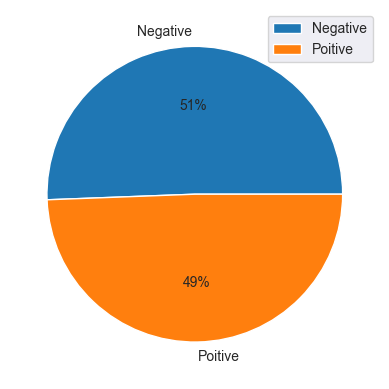

In [128]:
plt.pie(data['target'].value_counts(), labels=['Negative', 'Poitive'], autopct="%1.0f%%")
plt.legend()
plt.show()

## NLP (tokenization and TF-IDF)

In [115]:
nltk.download('punkt')
from nltk.tokenize import word_tokenize

# Example: Tokenize a single tweet
data["tokens"] = data["normalized_tweet"].apply(word_tokenize)


[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


In [116]:
data["tokens"] = data["tokens"].apply(lambda x: [word.lower() for word in x])


In [117]:

nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
data["tokens"] = data["tokens"].apply(lambda x: [word for word in x if word not in stop_words])


[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


In [118]:

stemmer = PorterStemmer()
data["tokens"] = data["tokens"].apply(lambda x: [stemmer.stem(word) for word in x])


In [119]:
# from scipy.sparse import csr_matrix
#
# # Apply TF-IDF to your tweet data
# tfidf = TfidfVectorizer(max_features=5000)  # Adjust max_features if needed
# X_tfidf = tfidf.fit_transform(data["normalized_tweet"])
#
# # We can work with the sparse matrix directly without converting it to a dense DataFrame
# # If needed, we can convert the sparse matrix to a DataFrame later for analysis or export
#
# # For example, getting the feature names:
# feature_names = tfidf.get_feature_names_out()
#
# # If needed, you can convert it to a sparse DataFrame
# tfidf_sparse_df = pd.DataFrame.sparse.from_spmatrix(X_tfidf, columns=feature_names)
#
# # Show first 5 rows (or any sample)
# print(tfidf_sparse_df.head())


   aa  aah  aahh  aaron  abandoned  abc  ability  abit  able  about  ...  yumm  yummy  yup  zac  zealand  zero  zombie  zone  zoo  zz
0   0    0     0      0          0    0        0     0     0      0  ...     0      0    0    0        0     0       0     0    0   0
1   0    0     0      0          0    0        0     0     0      0  ...     0      0    0    0        0     0       0     0    0   0
2   0    0     0      0          0    0        0     0     0      0  ...     0      0    0    0        0     0       0     0    0   0
3   0    0     0      0          0    0        0     0     0      0  ...     0      0    0    0        0     0       0     0    0   0
4   0    0     0      0          0    0        0     0     0      0  ...     0      0    0    0        0     0       0     0    0   0

[5 rows x 5000 columns]


In [142]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, Dropout, SpatialDropout1D
from tensorflow.keras.preprocessing.sequence import pad_sequences


tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(data['normalized_tweet'])
X = tokenizer.texts_to_sequences(data['normalized_tweet'])

# Pad sequences to the same length
X_pad = pad_sequences(X, maxlen=100)

# Define the model
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128, input_length=100))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# Train the model
model.fit(X_pad, data['target'], epochs=5, batch_size=64, validation_split=0.2)


C:\Users\Shosh\PyCharmMiscProject\.venv\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d_2             │ ?                      │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
  291/17372 ━━━━━━━━━━━━━━━━━━━━ 27:35 97ms/step - accuracy: 0.0036 - loss: -3.7584

KeyboardInterrupt: 

## bazbt el target

In [120]:
print(data["target"].unique())


[np.int64(0) np.int64(4)]


In [121]:
# Convert target to integers if they are valid
data["target"] = data["target"].apply(lambda x: int(x) if isinstance(x, (int, float)) else x)

# Check unique values again to see if they are consistent
print(data["target"].unique())


[0 4]


In [122]:
# # Convert target values according to the specified mapping
# data["target"] = data["target"].replace({0: -1, 2: 0, 4: 1})
#
# # Check unique values again to see if they are consistent
# print(data["target"].unique())


In [123]:
# Convert target values: 0 → -1, 4 → 1
data["target"] = data["target"].replace({0: -1, 4: 1})

# Check unique values again to ensure correctness
print(data["target"].unique())
# Drop neutral tweets if still present
data = data[data["target"] != 2]


[-1  1]


In [125]:
data.head()

,tweet,target,normalized_tweet,non_english,tokens
0,- A that's a bummer. You shoulda got David Car...,-1,a thats a bummer you shoulda got david carr of...,False,"[that, bummer, shoulda, got, david, carr, thir..."
1,is upset that he can't update his Facebook by ...,-1,is upset that he cant update his facebook by t...,False,"[upset, cant, updat, facebook, text, might, cr..."
2,I dived many times for the ball. Managed to sa...,-1,i dived many times for the ball managed to sav...,False,"[dive, mani, time, ball, manag, save, rest, go..."
3,my whole body feels itchy and like its on fire,-1,my whole body feels itchy and like its on fire,False,"[whole, bodi, feel, itchi, like, fire]"
4,"no, it's not behaving at all. i'm mad. why am ...",-1,no its not behaving at all im mad why am i her...,False,"[behav, im, mad, cant, see]"


## Making sure classes dont overlap

In [130]:
# Assuming binary classification: 0 and 1
tokens_class_0 = set([token for tokens in data[data['target'] == -1]['tokens'] for token in tokens])
tokens_class_1 = set([token for tokens in data[data['target'] == 1]['tokens'] for token in tokens])

overlap = tokens_class_0.intersection(tokens_class_1)
print(f"Overlapping tokens between classes: {len(overlap)}")


Overlapping tokens between classes: 66159


In [133]:
from collections import Counter

# Token counters per class
tokens_0 = [t for tokens in data[data['target'] == -1]['tokens'] for t in tokens]
tokens_1 = [t for tokens in data[data['target'] == 1]['tokens'] for t in tokens]

counter_0 = Counter(tokens_0)
counter_1 = Counter(tokens_1)

# Vocabulary size
full_vocab = set(counter_0.keys()) | set(counter_1.keys())
vocab_size = len(full_vocab)
top_n = int(vocab_size * 0.8)  # Adjust % here

# Unique class-specific tokens
unique_0 = set(counter_0.keys()) - set(counter_1.keys())
unique_1 = set(counter_1.keys()) - set(counter_0.keys())

# Top-N unique tokens from each class
top_0 = set([t for t, _ in counter_0.most_common(top_n) if t in unique_0])
top_1 = set([t for t, _ in counter_1.most_common(top_n) if t in unique_1])

selected_tokens = top_0 | top_1

# Filter tokens
data['tokens_filtered'] = data['tokens'].apply(lambda tokens: [t for t in tokens if t in selected_tokens])


In [134]:
data['token_count_before'] = data['tokens'].apply(len)
data['token_count_after'] = data['tokens_filtered'].apply(len)

retention_ratio = (data['token_count_after'].sum() / data['token_count_before'].sum()) * 100
print(f"Token retention after filtering: {retention_ratio:.2f}%")


Token retention after filtering: 2.71%


In [135]:
for word in ['awe', 'love', 'miss']:
    count_pos = sum(word in tokens for tokens in data[data['target'] == 1]['tokens'])
    count_neg = sum(word in tokens for tokens in data[data['target'] == 0]['tokens'])
    print(f"{word}: Positive={count_pos}, Negative={count_neg}")


awe: Positive=316, Negative=0
love: Positive=51242, Negative=0
miss: Positive=8211, Negative=0


In [136]:
print(data[data['tokens'].apply(lambda x: 'love' in x)]['target'].value_counts())


target
 1    51242
-1    19057
Name: count, dtype: int64


## Saving data to new csv file

In [129]:
#columns: normalized_tweet, tokens, target
selected_cols = data[['normalized_tweet', 'tokens', 'target']]

# Save to CSV
selected_cols.to_csv('English_cleaned.csv', index=False)

